## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string     
from bs4 import BeautifulSoup
from collections import defaultdict

import nltk
from nltk.tokenize import word_tokenize, WhitespaceTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import spacy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC 
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier 
from sklearn.metrics import accuracy_score

#nltk.download('punkt')
#nltk.download('stopwords')

stop_words = stopwords.words('english')
sp = spacy.load('en_core_web_sm')

## All Data information

In [2]:
# read all datasets
df_appceleratorstudio = pd.read_csv('./data/appceleratorstudio.csv')
df_aptanastudio = pd.read_csv('./data/aptanastudio.csv')
df_bamboo = pd.read_csv('./data/bamboo.csv')
df_clover = pd.read_csv('./data/clover.csv')
df_datamanagement = pd.read_csv('./data/datamanagement.csv')
df_duracloud = pd.read_csv('./data/duracloud.csv')
df_jirasoftware = pd.read_csv('./data/jirasoftware.csv')
df_mesos = pd.read_csv('./data/mesos.csv')
df_moodle = pd.read_csv('./data/moodle.csv')
df_mule = pd.read_csv('./data/mule.csv')
df_mulestudio = pd.read_csv('./data/mulestudio.csv')
df_springxd = pd.read_csv('./data/springxd.csv')
df_talenddataquality = pd.read_csv('./data/talenddataquality.csv')
df_talendesb = pd.read_csv('./data/talendesb.csv')
df_titanium = pd.read_csv('./data/titanium.csv')
df_usergrid = pd.read_csv('./data/usergrid.csv')

In [3]:
# union all datasets
df_all = pd.concat([
    df_appceleratorstudio,
    df_aptanastudio,
    df_bamboo,
    df_clover,
    df_datamanagement,
    df_duracloud,
    df_jirasoftware,
    df_mesos,
    df_moodle,
    df_mule,
    df_mulestudio,
    df_springxd,
    df_talenddataquality,
    df_talendesb,
    df_titanium,
    df_usergrid
], ignore_index=True)

In [4]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23313 entries, 0 to 23312
Data columns (total 4 columns):
issuekey       23313 non-null object
title          23313 non-null object
description    21082 non-null object
storypoint     23313 non-null int64
dtypes: int64(1), object(3)
memory usage: 728.6+ KB


In [5]:
# converting storypoint column type int->str
df_all['storypoint'] = df_all['storypoint'].astype(str)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23313 entries, 0 to 23312
Data columns (total 4 columns):
issuekey       23313 non-null object
title          23313 non-null object
description    21082 non-null object
storypoint     23313 non-null object
dtypes: object(4)
memory usage: 728.6+ KB


In [6]:
# count all missing values
for col in df_all.columns:
    print(col, df_all[col].isnull().sum())

issuekey 0
title 0
description 2231
storypoint 0


In [7]:
# show all missing value rows
df_all[df_all.isna().any(axis=1)]

issuekey                                              title  \
44        TISTUD-136     Add user-agent icons for iPhone, iPad, Android   
74        TISTUD-280           Add domain and login to cloud app wizard   
107       TISTUD-407  Confirm TiStudio default update set is set to ...   
114       TISTUD-475                  Add unit tests for TiAppModelUtil   
115       TISTUD-476             Add unit tests for TitaniumUpdaterUtil   
116       TISTUD-477                 Add unit tests for MobileUsageUtil   
117       TISTUD-478                Add unit tests for DesktopUsageUtil   
118       TISTUD-479  Add unit tests for SDKLocator, SDKManager, SDK...   
123       TISTUD-492  Create feature and builder for TiStudio unit t...   
131       TISTUD-518          Look into adding unit tests for packaging   
164       TISTUD-775  Disable the V8 option in the TiApp editor when...   
185       TISTUD-887                   display background from PSD file   
201       TISTUD-959                        Implement Snippet Filtering   
222      TISTUD-1051   Externalize UI strings in Titanium Desktop ruble   
223      TISTUD-1052    Externalize UI strings in Titanium Mobile ruble   
225      TISTUD-1055                 Create test plan for Snippets view   
233      TISTUD-1079  Exclude build folder from text search made in ...   
257      TISTUD-1167  Investigate ability to auto-scroll lock the co...   
258      TISTUD-1168  Add Common Interface for consolidating UI erro...   
432      TISTUD-1511  Run Android preference page loading in the bac...   
468      TISTUD-1590  Split titanium mobile plugin into ui and core ...   
663      TISTUD-2008  The typo in the new signup page: should say "p...   
685      TISTUD-2048  Update "Explore" tab to show list of my module...   
686      TISTUD-2049  Reflect current status of each module in explo...   
687      TISTUD-2050  When clicking link to install module, run modu...   
707      TISTUD-2083  Investigate if the CTRL-SHIFT-W is related to ...   
708      TISTUD-2084  Investigate if the CTRL+SHIFT+W is related to ...   
969      TISTUD-2666   Content overlay - icon, description etc for D...   
982      TISTUD-2714  Change the wizard image in Update wizard to lo...   
983      TISTUD-2715  Add user id field to the password sudo page in...   
...              ...                                                ...   
23215   USERGRID-898  Add proper error checking to Asset Code along ...   
23223   USERGRID-908                             run specific migration   
23226   USERGRID-914   Blog post for 10k TPS and horizontal scalability   
23230   USERGRID-929  Test the creation of entities which have an Ol...   
23231   USERGRID-933  [SPIKE] Understand what remains and break up t...   
23237   USERGRID-941  Spike: Investigate using Java Annotations to g...   
23240   USERGRID-950  Remove Cassandra Keyspace name from Index Nami...   
23242   USERGRID-991                 Fix tests after Jersey 2.0 upgrade   
23243   USERGRID-992                        Enable Org-level properties   
23246  USERGRID-1005   Add Background processing for delete application   
23248  USERGRID-1013        Automate upload of api baas 2.1 build to s3   
23249  USERGRID-1015                       Test Notification Migration    
23253  USERGRID-1022                remove batching in index processing   
23254  USERGRID-1023  Delete from collection does not use SQS or the...   
23260  USERGRID-1032  Test and confirm Usergrid 2.1 works with Cassa...   
23261  USERGRID-1033  Test and confirm Usergrid 2.0 works with Cassa...   
23264  USERGRID-1038    2.1-release: fix index batching from SQS reader   
23273  USERGRID-1069                 implement build metrics in jenkins   
23274  USERGRID-1071                        Test iOS push notifications   
23275  USERGRID-1072                    Test Android push notifications   
23276  USERGRID-1073                                 Test Windows phone   
23277  USERGRID-1074  [SPIKE] Evaluat

In [8]:
# storypoint frequencies
# should be Fibonacci-like format: 0, 0.5????, 1, 2, 3, 5, 8, 13, 20, 40, 100. 
# but here we have 21, 4, 9, 34,... anomaly)))
df_all['storypoint'].value_counts()

5      4319
1      4225
3      3973
2      3406
8      3112
13      981
4       836
20      452
6       406
10      389
40      182
21      117
100     111
12       82
15       69
16       59
30       58
7        53
9        34
34       30
14       26
60       25
50       23
79       21
11       21
19       20
17       20
26       18
53       18
18       16
       ... 
70        4
90        4
31        4
52        3
27        3
47        3
43        2
48        2
64        2
55        2
63        1
95        1
69        1
71        1
96        1
51        1
88        1
84        1
46        1
57        1
68        1
92        1
83        1
66        1
58        1
41        1
94        1
82        1
89        1
73        1
Name: storypoint, Length: 80, dtype: int64

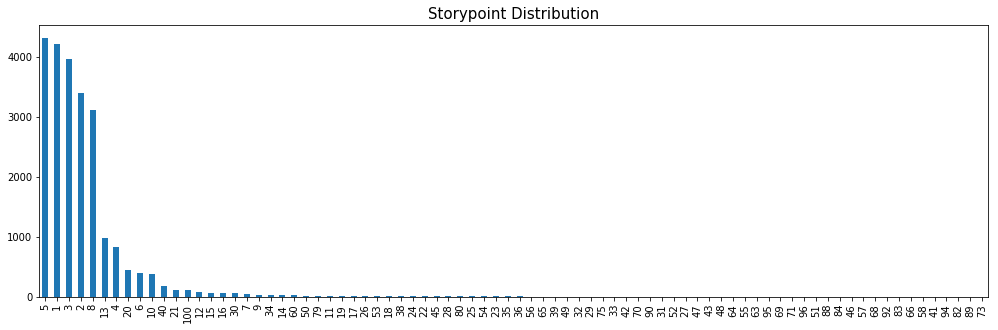

In [9]:
plt.figure(figsize=(17,5))
df_all['storypoint'].value_counts().plot(kind='bar')
plt.title('Storypoint Distribution', fontsize=15);

In [10]:
# valid label names
label_names = ['1', '2', '3', '5', '8', '13', '20', '40', '100']

In [11]:
# checking valid storypoints count, it's about 89%
len([v for v in df_all['storypoint'].values if v in label_names])

20761

In [12]:
# new dataframe with valid datapoints
df_all = df_all.loc[df_all['storypoint'].isin(label_names)]
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20761 entries, 0 to 23312
Data columns (total 4 columns):
issuekey       20761 non-null object
title          20761 non-null object
description    18918 non-null object
storypoint     20761 non-null object
dtypes: object(4)
memory usage: 811.0+ KB


In [13]:
# count all missing values
for col in df_all.columns:
    print(col, df_all[col].isnull().sum())

issuekey 0
title 0
description 1843
storypoint 0


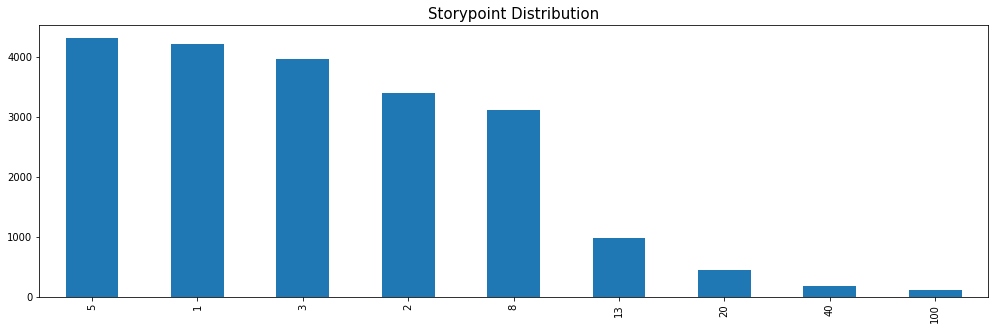

In [14]:
plt.figure(figsize=(17,5))
df_all['storypoint'].value_counts().plot(kind='bar')
plt.title('Storypoint Distribution', fontsize=15);

## Preprocessing

In [15]:
labels = df_all["storypoint"].values
X = df_all.drop(["issuekey", "storypoint"], axis=1)


# issuekey include???
X.head()

title  \
0  Add CA against object literals in function inv...   
1  Update branding for Appcelerator plugin to App...   
2                Create new JSON schema for SDK team   
3            Create Project References Property Page   
4                         New Desktop Project Wizard   

                                         description  
0  {html}<div><p>The idea here is that if our met...  
1  {html}<div><p>At least fix feature icons, asso...  
2  {html}<div><p>Create JSON schema containing pr...  
3  {html}<div><p>Create property page for project...  
4  {html}<div><p>Desktop (need to convert existin...

In [16]:
# replace missing values with empty strings
X = X.fillna('')

In [17]:
# concat title to description by space/dot?? 
# may be model will give to title more weights than to the description, so we should't concat them???
X["title_description"] = X["title"] + " " +  X["description"]
X["title_description"][2]

'Create new JSON schema for SDK team {html}<div><p>Create JSON schema containing properties required for proper CA. Hand schema to Platform team to output new docs/JSON files as part of new SDK releases. It may be that instead we can use the vsdoc format, in which case we will need to indicate to the SDK team additional items to be added to the docs.</p></div>{html}'

In [18]:
text = X["title_description"].to_numpy()
print("text length is", len(text))
text

text length is 20761


array(['Add CA against object literals in function invocations {html}<div><p>The idea here is that if our metadata captures a type as function arg, we should be able to create an instance of that type as an object literal as an arg to a function invocation. For example:</p> <pre> <code>Ti.UI.createLabel( { &lt;property-ca-here&gt; } );</code> </pre></div>{html}',
       'Update branding for Appcelerator plugin to Appcelerator logo  {html}<div><p>At least fix feature icons, associated natures. Perhaps other screens as well.</p></div>{html}',
       'Create new JSON schema for SDK team {html}<div><p>Create JSON schema containing properties required for proper CA. Hand schema to Platform team to output new docs/JSON files as part of new SDK releases. It may be that instead we can use the vsdoc format, in which case we will need to indicate to the SDK team additional items to be added to the docs.</p></div>{html}',
       ...,
       'Proof of Concept: use Akka for Unique Value enforcement

In [19]:
def preprocess_txt(doc):
    #lowercase
    doc = doc.lower() 
    #remove "{html}" strings
    doc = re.sub('\{html\}', '', doc)
    #remove html tags
    doc = BeautifulSoup(doc, 'html.parser').get_text()
    #remove all paths/urls/--keys
    pattern = re.compile(r'[/\-+\\+]')
    doc_split = [token for token in WhitespaceTokenizer().tokenize(doc) if not pattern.findall(token)]
    doc = " ".join(doc_split)

    #tokenize and remove stop words and punctuation symbols and spaces using spaCy
    #use lemmas
    doc_spacy = sp(doc)
    doc_tokenized_spacy = [token.lemma_ for token in doc_spacy
        if not token.is_stop and not token.is_punct and not token.is_space]

    #preprocessing additionaly with nltk give much better results
    doc_nltk = " ".join(doc_tokenized_spacy)
    #tokenize and remove stop words and punctuation symbols using nltk 
    #remove numerics
    doc_tokenized_spacy_nltk = [token for token in nltk.word_tokenize(doc_nltk)
        if token.isalpha()]
    
    return doc_tokenized_spacy_nltk                                         

In [20]:
# creating the corpus
def create_corpus(text_arr):
    corpus = []

    for doc in text_arr:
        prep_doc = preprocess_txt(doc)                            
        corpus.append(prep_doc)
        
    return corpus    

In [21]:
corpus = create_corpus(text)
len(corpus)

20761

In [22]:
def create_vocab(corpus):
    vocab = set(token for doc in corpus for token in doc)
    
    return vocab

In [23]:
vocab = create_vocab(corpus)
len(vocab)

22458

In [24]:
# an example of preprocessing before/after

print("---------------Original text------------------\n")
doc = text[7865]
print(doc)
doc = doc.lower()
doc = doc.replace('\{html\}', '')
doc = BeautifulSoup(doc, 'html.parser').get_text()

print("\n---------------After removing paths/urls/--keys------------------\n")
pattern = re.compile(r'[/\-+\\+]')
doc_split = [token for token in WhitespaceTokenizer().tokenize(doc) if not pattern.findall(token)]
doc = " ".join(doc_split)

print(doc_split)

#preprocessing with only spaCy
print("\n---------------spaCy prep + lemma------------------\n")
doc_spacy = sp(doc)
doc_tokenized_spacy = [token.lemma_ for token in doc_spacy
    if not token.is_stop and not token.is_punct and not token.is_space]
print(doc_tokenized_spacy)

#preprocessing with spaCy + nltk
# print("\n---------------spaCy + lemma + nltk prep + is_not_numeric-----------------\n")
# doc_nltk = " ".join(doc_tokenized_spacy)
# doc_tokenized_spacy_nltk = [token for token in nltk.word_tokenize(doc_nltk)
#     if token not in stop_words and token not in string.punctuation and not token.isnumeric()]
# print(doc_tokenized_spacy_nltk)

print("\n---------------spaCy + lemma + nltk prep + isalpha-----------------\n")
doc_nltk = " ".join(doc_tokenized_spacy)
doc_tokenized_spacy_nltk = [token for token in nltk.word_tokenize(doc_nltk)
    if token not in stop_words and token not in string.punctuation and token.isalpha()]
print(doc_tokenized_spacy_nltk)

---------------Original text------------------

Can only perform a bulk action (e.g. deletion) on a maximum of 2 spaces at a time Today I went in to cleanup some old demo/test content in 'dspacetest.duracloud.org'.  When I selected multiple spaces, I found that no matter how many spaces I selected, the total always read "2 space(s) selected".   Even worse, I selected a total of 5 spaces and clicked "Delete Selected Spaces" button.  Only the first 2 spaces I selected were deleted.  The other 3 were kept.  It seems as though the multi-select option only captures the first two spaces you select...after that, any other selections are ignored.  Carissa has verified that this also seems to occur on demo.duracloud.org.

---------------After removing paths/urls/--keys------------------

['can', 'only', 'perform', 'a', 'bulk', 'action', '(e.g.', 'deletion)', 'on', 'a', 'maximum', 'of', '2', 'spaces', 'at', 'a', 'time', 'today', 'i', 'went', 'in', 'to', 'cleanup', 'some', 'old', 'content', 'in',

In [25]:
def show_most_freq_n(corp, n):
    allwords = [token for doc in corp for token in doc]
    
    # word freqs    
    mostcommon_small = nltk.FreqDist(allwords).most_common(n)
    print(mostcommon_small)
    x, y = zip(*mostcommon_small)
    plt.figure(figsize=(50,30))
    plt.margins(0.02)
    plt.bar(x, y)
    plt.xlabel('Words', fontsize=50)
    plt.ylabel('Frequency of Words', fontsize=50)
    plt.yticks(fontsize=40)
    plt.xticks(rotation=60, fontsize=40)
    plt.title('Frequency of {} Most Common Words'.format(n), fontsize=60)
    plt.show()    

[('code', 9877), ('error', 8391), ('file', 6569), ('create', 6527), ('add', 5689), ('test', 5017), ('project', 4985), ('studio', 4860), ('new', 4833), ('run', 4819), ('build', 4713), ('user', 4403), ('result', 4334), ('use', 4320), ('need', 4235), ('module', 4124), ('update', 3885), ('step', 3543), ('fail', 3443), ('version', 3438), ('app', 3295), ('message', 3247), ('set', 3191), ('work', 3184), ('info', 3183), ('support', 3157), ('change', 3142), ('android', 3013), ('log', 2864), ('issue', 2665), ('titanium', 2664), ('window', 2642), ('default', 2611), ('sdk', 2543), ('like', 2423), ('var', 2405), ('start', 2385), ('property', 2382), ('type', 2300), ('method', 2234), ('value', 2226), ('expect', 2223), ('open', 2219), ('job', 2212), ('select', 2188), ('function', 2156), ('line', 2144), ('master', 2076), ('source', 2068), ('remove', 2042)]


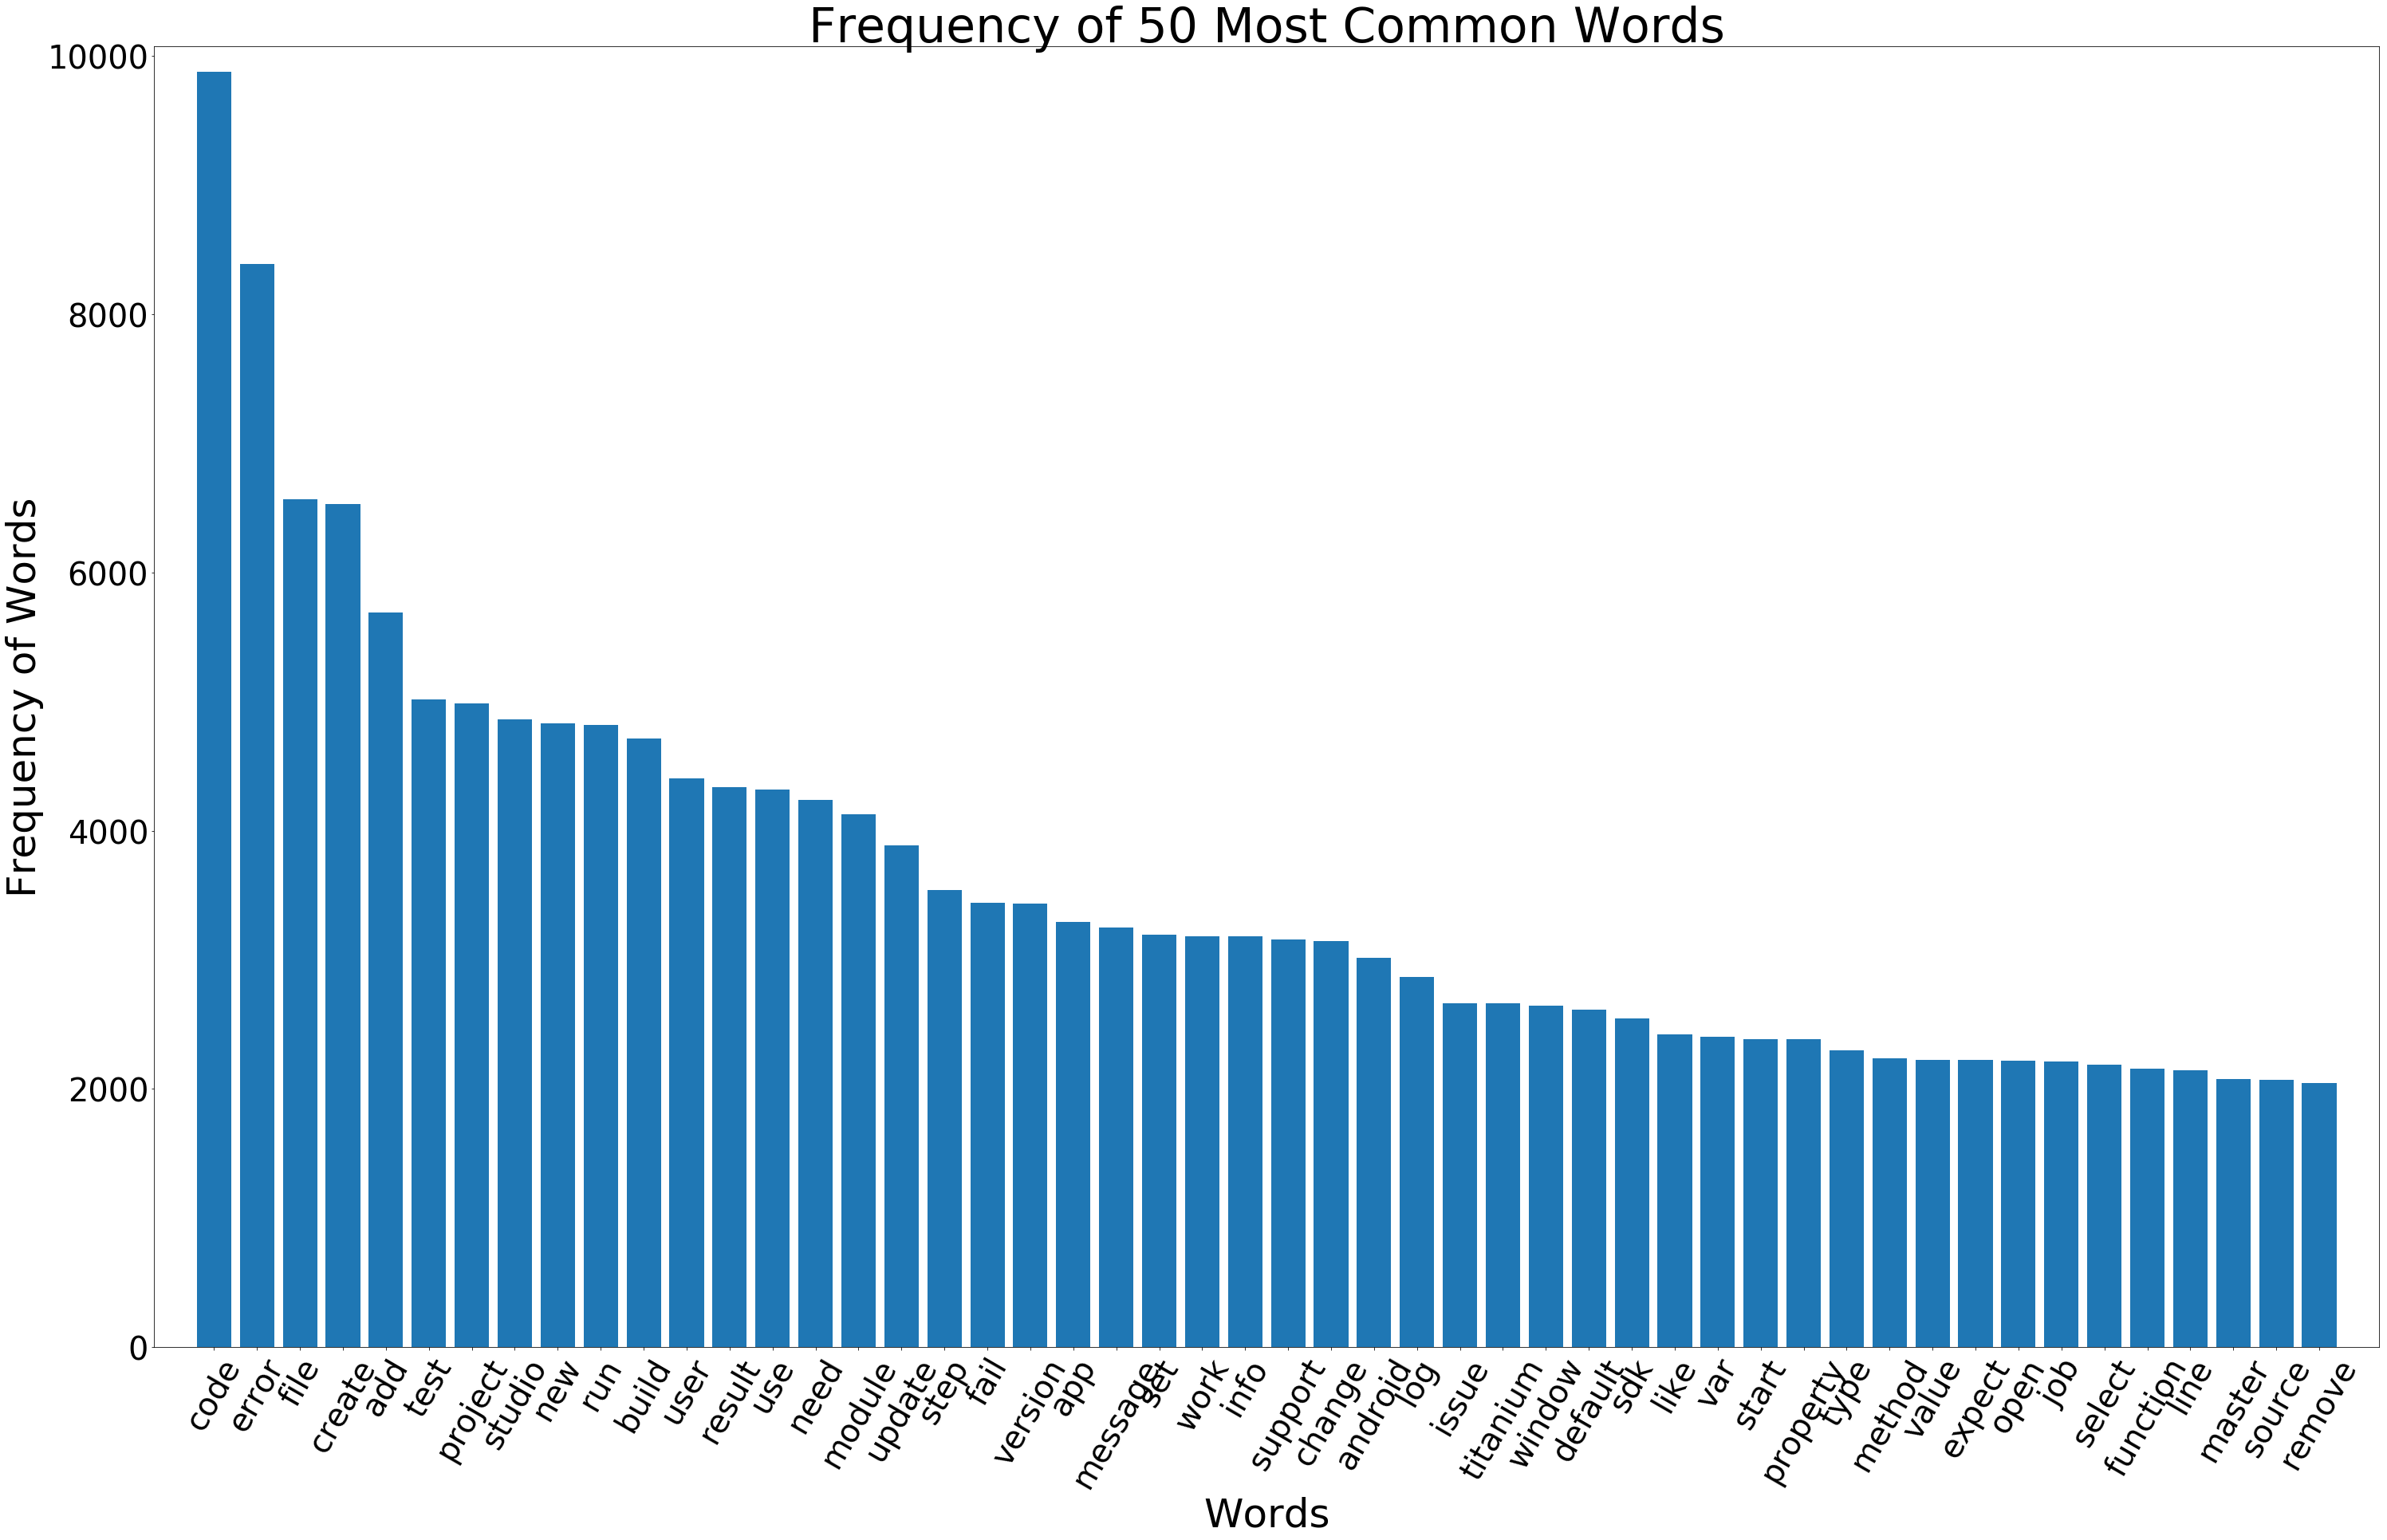

In [26]:
show_most_freq_n(corpus, 50)

In [27]:
def build_cond_freqs(corpus, labels):
    pairs = []
    for doc, label in zip(corpus, labels):
        for token in doc:
            pair = (str(label), token)
            pairs.append(pair)
    print(len(pairs))
    freqs = nltk.ConditionalFreqDist(pairs)
    
    return freqs

In [29]:
cond_freqs = build_cond_freqs(corpus, labels)
cond_freqs.conditions()

784437


['5', '40', '1', '20', '8', '100', '13', '2', '3']

In [30]:
cond_freqs["3"].most_common()

[('code', 2018),
 ('error', 1957),
 ('create', 1346),
 ('build', 1093),
 ('file', 1085),
 ('test', 1065),
 ('add', 1052),
 ('module', 1030),
 ('project', 1014),
 ('studio', 918),
 ('new', 914),
 ('run', 895),
 ('result', 890),
 ('step', 886),
 ('use', 861),
 ('message', 801),
 ('android', 780),
 ('need', 765),
 ('sdk', 760),
 ('update', 758),
 ('user', 741),
 ('app', 729),
 ('info', 723),
 ('fail', 719),
 ('version', 671),
 ('set', 637),
 ('titanium', 593),
 ('default', 589),
 ('method', 586),
 ('support', 580),
 ('work', 577),
 ('log', 565),
 ('change', 556),
 ('issue', 542),
 ('http', 539),
 ('master', 529),
 ('like', 513),
 ('resource', 481),
 ('start', 477),
 ('service', 468),
 ('property', 464),
 ('job', 457),
 ('select', 453),
 ('source', 452),
 ('var', 449),
 ('value', 447),
 ('remove', 438),
 ('expect', 438),
 ('open', 427),
 ('reproduce', 424),
 ('ios', 423),
 ('window', 421),
 ('type', 418),
 ('exception', 418),
 ('process', 416),
 ('configuration', 415),
 ('debug', 413),
 ('

In [31]:
def vocab_word_features(corpus, vocab):
    feature_dict = defaultdict(int)
    for token in vocab:
        feature_vec = []
        for l in label_names:
            feature_vec.append(cond_freqs[l][token])
        pair = (token, feature_vec)
        feature_dict[token] = feature_vec    
        
    return feature_dict

In [32]:
vocab_features = vocab_word_features(corpus, vocab)
vocab_features

defaultdict(int,
            {'screenreader': [0, 0, 1, 2, 2, 1, 0, 1, 0],
             'functorkey': [3, 5, 2, 0, 0, 0, 0, 0, 0],
             'mybigjobby': [0, 0, 1, 0, 0, 0, 0, 0, 0],
             'ssisession': [0, 2, 0, 0, 0, 0, 0, 0, 0],
             'settle': [0, 2, 0, 0, 1, 0, 0, 0, 0],
             'alloytwocall': [0, 0, 1, 0, 0, 0, 0, 0, 0],
             'continuously': [4, 4, 7, 6, 3, 0, 0, 1, 0],
             'recreate': [10, 3, 25, 13, 9, 4, 0, 0, 0],
             'parseshort': [0, 0, 0, 0, 1, 0, 0, 0, 0],
             'bnsf': [0, 0, 0, 1, 0, 0, 0, 0, 0],
             'interfaceoperation': [0, 2, 0, 0, 0, 0, 0, 0, 0],
             'jobfactory': [0, 0, 0, 0, 1, 0, 0, 0, 0],
             'currentusernotificationsetting': [0, 0, 1, 0, 0, 1, 0, 0, 0],
             'influence': [3, 0, 7, 1, 2, 1, 0, 0, 0],
             'poasassignment': [0, 0, 0, 0, 1, 0, 0, 0, 0],
             'superclassorinterface': [0, 0, 0, 0, 0, 0, 0, 1, 0],
             'isn': [0, 0, 0, 1, 0, 0, 0, 0, 0],

In [33]:
def doc_feature_extraction(doc, vocab_features):
    doc_feautures = np.zeros(9, dtype='int')
    for token in doc:
        doc_feautures += vocab_features[token]
#     # init with bias
#     doc_feautures = np.insert(doc_feautures, 0, 1, axis=0)
        
    return  doc_feautures

In [34]:
def corpus_feature_extraction(corpus, vocab_features):
    corpus_features = [doc_feature_extraction(doc, vocab_features) for doc in corpus]
    
    return corpus_features

In [35]:
corpus_features = corpus_feature_extraction(corpus, vocab_features)

In [36]:
# example
print("Document:\n", corpus[0], '\n')
print("Feature vector of the document:", corpus_features[0])

Document:
 ['add', 'object', 'literal', 'function', 'invocation', 'idea', 'metadata', 'capture', 'type', 'function', 'arg', 'able', 'create', 'instance', 'type', 'object', 'literal', 'arg', 'function', 'invocation', 'example'] 

Feature vector of the document: [5249 4234 5533 7194 5265 1919  685  553   90]


/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


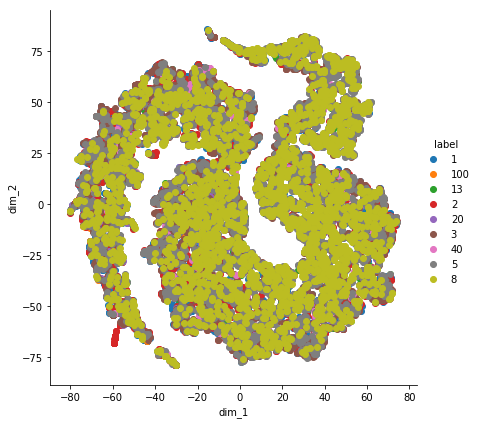

In [38]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=42)

tsne_data = model.fit_transform(corpus_features)
# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=('dim_1','dim_2', 'label'))
# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue='label', size=6).map(plt.scatter, 'dim_1','dim_2').add_legend()
plt.show()

## Classification and prediction with frequency features

In [39]:
features_train, features_test, labels_train, labels_test = train_test_split(corpus_features, labels, test_size=0.3, random_state=111)

In [40]:
svc = LinearSVC(multi_class='crammer_singer')
knc = KNeighborsClassifier(n_neighbors=50)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='lbfgs', penalty='l2', multi_class='multinomial', max_iter=10000)
rfc = RandomForestClassifier(n_estimators=31, random_state=111)
abc = AdaBoostClassifier(n_estimators=62, random_state=111)
bc = BaggingClassifier(n_estimators=9, random_state=111)
etc = ExtraTreesClassifier(n_estimators=9, random_state=111)

In [41]:
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc, 'AdaBoost': abc, 'BgC': bc, 'ETC': etc}

In [42]:
def train_clf(clf, train_x, train_y):
    clf.fit(train_x, train_y)

In [43]:
def predict_labels(clf, features):
    return (clf.predict(features))

In [44]:
freq_pred_scores = []
for k,v in clfs.items():
    train_clf(v, features_train, labels_train)
    pred = predict_labels(v,features_test)
    freq_pred_scores.append((k, [accuracy_score(labels_test,pred)]))

/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [45]:
df = pd.DataFrame.from_items(freq_pred_scores, orient='index', columns=['Score'])
df.sort_values(by=['Score'])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """Entry point for launching an IPython kernel.


Score
SVC       0.076096
NB        0.237438
DT        0.237598
BgC       0.263285
ETC       0.263606
AdaBoost  0.263606
RF        0.281426
KN        0.287044
LR        0.293948

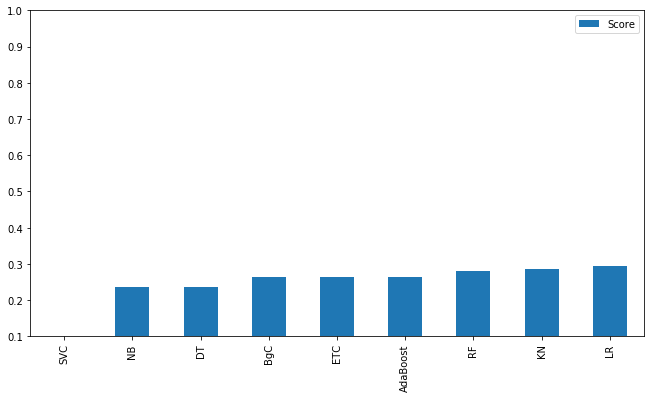

In [46]:
df.sort_values(by=['Score']).plot(kind='bar', figsize=(11,6), ylim=(0.1,1.0));

In [47]:
freq_pred_scores

[('DT', [0.23759833039011077]),
 ('ETC', [0.26360571520308235]),
 ('KN', [0.28704446941724193]),
 ('RF', [0.2814255899823407]),
 ('SVC', [0.07609568148980575]),
 ('NB', [0.23743779097768503]),
 ('LR', [0.2939476641515492]),
 ('BgC', [0.26328463637823085]),
 ('AdaBoost', [0.26360571520308235])]

In [48]:
freq_pred_scores_sorted = sorted(freq_pred_scores, key=lambda x: x[0])
freq_pred_scores_sorted

[('AdaBoost', [0.26360571520308235]),
 ('BgC', [0.26328463637823085]),
 ('DT', [0.23759833039011077]),
 ('ETC', [0.26360571520308235]),
 ('KN', [0.28704446941724193]),
 ('LR', [0.2939476641515492]),
 ('NB', [0.23743779097768503]),
 ('RF', [0.2814255899823407]),
 ('SVC', [0.07609568148980575])]